In [1]:
# Recurrent Neural Network

# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
# Importing the training set
dataset_train = pd.read_csv('data/SP500/symbols/GOOG.csv')

In [4]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-10-01,437.280914,440.966949,437.181549,440.634094,440.634094,3391400
1,2013-10-02,438.512909,441.806488,436.073761,441.125916,441.125916,3009900
2,2013-10-03,441.130859,444.161163,433.232239,435.214355,435.214355,4261500
3,2013-10-04,434.672882,435.919769,432.189026,433.356445,433.356445,2733600
4,2013-10-07,430.922272,434.171143,429.263062,430.072784,430.072784,2603900
5,2013-10-08,429.864136,430.192017,423.063385,424.076782,424.076782,3912500
6,2013-10-09,425.373352,428.537781,418.766327,425.164703,425.164703,5337000
7,2013-10-10,429.128937,431.607819,427.325653,431.314728,431.314728,4539800
8,2013-10-11,430.216858,433.917786,429.854218,433.177612,433.177612,2836100
9,2013-10-14,430.529816,435.293823,429.898926,435.224274,435.224274,2503300


In [5]:
training_set = dataset_train.iloc[:,1:-1]#.values

In [6]:
training_set

,Open,High,Low,Close,Adj Close
0,437.280914,440.966949,437.181549,440.634094,440.634094
1,438.512909,441.806488,436.073761,441.125916,441.125916
2,441.130859,444.161163,433.232239,435.214355,435.214355
3,434.672882,435.919769,432.189026,433.356445,433.356445
4,430.922272,434.171143,429.263062,430.072784,430.072784
5,429.864136,430.192017,423.063385,424.076782,424.076782
6,425.373352,428.537781,418.766327,425.164703,425.164703
7,429.128937,431.607819,427.325653,431.314728,431.314728
8,430.216858,433.917786,429.854218,433.177612,433.177612
9,430.529816,435.293823,429.898926,435.224274,435.224274


In [7]:
training_set = dataset_train.iloc[:,5:6].values

In [8]:
training_set

array([[ 440.634094],
       [ 441.125916],
       [ 435.214355],
       ...,
       [1231.150024],
       [1249.300049],
       [1239.119995]])

In [9]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler


In [10]:
sc = MinMaxScaler(feature_range = (0, 1))



In [11]:
training_set_scaled = sc.fit_transform(training_set)

In [12]:
training_set_scaled

array([[0.01961179],
       [0.02019434],
       [0.01319222],
       ...,
       [0.95596116],
       [0.97745948],
       [0.96540142]])

In [13]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1239):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [14]:
X_train


array([[0.01961179, 0.02019434, 0.01319222, ..., 0.14530845, 0.15382862,
        0.15191042],
       [0.02019434, 0.01319222, 0.01099156, ..., 0.15382862, 0.15191042,
        0.15521733],
       [0.01319222, 0.01099156, 0.00710214, ..., 0.15191042, 0.15521733,
        0.15577039],
       ...,
       [0.84715495, 0.8475932 , 0.84430032, ..., 0.92543712, 0.94352413,
        0.96859945],
       [0.8475932 , 0.84430032, 0.82887838, ..., 0.94352413, 0.96859945,
        0.95596116],
       [0.84430032, 0.82887838, 0.8253368 , ..., 0.96859945, 0.95596116,
        0.97745948]])

In [15]:
y_train

array([0.15521733, 0.15577039, 0.15051   , ..., 0.95596116, 0.97745948,
       0.96540142])

In [16]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [17]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [18]:
# Initialising the RNN
regressor = Sequential()

In [19]:
# Adding the first LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [20]:
# Adding the second LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [21]:
# Adding the third LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [22]:
# Adding the fourth LSTM layer and some Dropout regularization
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [23]:
# Adding the output layer
regressor.add(Dense(units = 1))

In [24]:
# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [25]:
# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1179/1179 [==============================] - 15s - loss: 0.0370    
Epoch 2/100
1179/1179 [==============================] - 13s - loss: 0.0045    
Epoch 3/100
1179/1179 [==============================] - 13s - loss: 0.0042    
Epoch 4/100
1179/1179 [==============================] - 13s - loss: 0.0037    
Epoch 5/100
1179/1179 [==============================] - 13s - loss: 0.0035    
Epoch 6/100
1179/1179 [==============================] - 13s - loss: 0.0039    
Epoch 7/100
1179/1179 [==============================] - 13s - loss: 0.0035    
Epoch 8/100
1179/1179 [==============================] - 13s - loss: 0.0031    
Epoch 9/100
1179/1179 [==============================] - 13s - loss: 0.0029    
Epoch 10/100
1179/1179 [==============================] - 13s - loss: 0.0029    
Epoch 11/100
1179/1179 [==============================] - 13s - loss: 0.0030    
Epoch 12/100
1179/1179 [==============================] - 13s - loss: 0.0030    
Epoch 13/100
1179/1179 [=============

In [26]:
# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2018
dataset_test = pd.read_csv('data/SP500/symbols/GOOG_test.csv')


In [27]:
dataset_test

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-09-04,1204.270020,1212.989990,1192.500000,1197.000000,1197.000000,1831000
1,2018-09-05,1193.800049,1199.010010,1162.000000,1186.479980,1186.479980,2061300
2,2018-09-06,1186.300049,1186.300049,1152.000000,1171.439941,1171.439941,1888500
3,2018-09-07,1158.670044,1175.260010,1157.214966,1164.829956,1164.829956,1401300
4,2018-09-10,1172.189941,1174.540039,1160.109985,1164.640015,1164.640015,1115400
5,2018-09-11,1161.630005,1178.680054,1156.239990,1177.359985,1177.359985,1209300
6,2018-09-12,1172.719971,1178.609985,1158.359985,1162.819946,1162.819946,1295500
7,2018-09-13,1170.739990,1178.609985,1162.849976,1175.329956,1175.329956,1431200
8,2018-09-14,1179.099976,1180.425049,1168.329956,1172.530029,1172.530029,944000
9,2018-09-17,1170.140015,1177.239990,1154.030029,1156.050049,1156.050049,1306500


In [28]:
real_stock_price = dataset_test.iloc[:, 5:6].values

In [29]:
real_stock_price

array([[1197.      ],
       [1186.47998 ],
       [1171.439941],
       [1164.829956],
       [1164.640015],
       [1177.359985],
       [1162.819946],
       [1175.329956],
       [1172.530029],
       [1156.050049],
       [1161.219971],
       [1171.089966],
       [1186.869995],
       [1166.089966],
       [1173.369995],
       [1184.650024],
       [1180.48999 ],
       [1194.640015],
       [1193.469971]])

In [30]:
# Getting the predicted stock price of 2018
dataset_total = pd.concat((dataset_train['Adj Close'], dataset_test['Adj Close']), axis = 0)

In [31]:
inputs = dataset_total[len(dataset_total) - len(dataset_test) -60:].values

In [32]:
inputs = inputs.reshape(-1,1)

In [33]:
inputs = sc.transform(inputs)

In [42]:
X_test = []
for i in range(60, 79):
    X_test.append(inputs[i-60:i, 0])

In [43]:
X_test = np.array(X_test)

In [44]:
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [45]:
predicted_stock_price = regressor.predict(X_test)

In [46]:
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

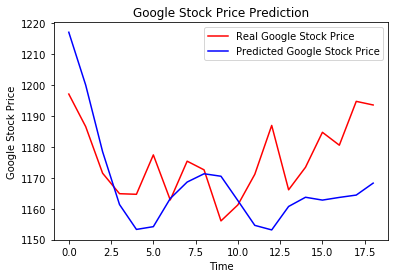

In [47]:
# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()

In [48]:
# Part 4 - Evaluating the RNN

import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


In [51]:
#  Evaluating the RNN
trainScore = mean_absolute_error(real_stock_price, predicted_stock_price)


In [57]:
print ("Score")
print('MAE:  %.4F' % (mean_absolute_error(real_stock_price, predicted_stock_price)))
print('RMSE: %.4f  ' % (math.sqrt(mean_squared_error(real_stock_price, predicted_stock_price))))


Score
MAE:  13.7930
RMSE: 16.8707  


In [58]:
print('MSE:  %.4f' % (mean_squared_error(real_stock_price, predicted_stock_price)))

MSE:  284.6206


In [61]:
print(real_stock_price)

[[1197.      ]
 [1186.47998 ]
 [1171.439941]
 [1164.829956]
 [1164.640015]
 [1177.359985]
 [1162.819946]
 [1175.329956]
 [1172.530029]
 [1156.050049]
 [1161.219971]
 [1171.089966]
 [1186.869995]
 [1166.089966]
 [1173.369995]
 [1184.650024]
 [1180.48999 ]
 [1194.640015]
 [1193.469971]]


In [62]:
print(predicted_stock_price)

[[1216.9537]
 [1199.888 ]
 [1178.3778]
 [1161.3324]
 [1153.2981]
 [1154.1881]
 [1163.2742]
 [1168.5928]
 [1171.266 ]
 [1170.4662]
 [1162.6027]
 [1154.6088]
 [1153.1389]
 [1160.7133]
 [1163.6812]
 [1162.7644]
 [1163.631 ]
 [1164.387 ]
 [1168.2441]]
